In [5]:
import os
import pandas as pd
import numpy as np

import kagglehub

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [6]:
# Download latest version
path = kagglehub.dataset_download("mehrdat/coral-reef-global-bleaching")

print("Path to dataset files:", path)

Path to dataset files: /Users/veronica/.cache/kagglehub/datasets/mehrdat/coral-reef-global-bleaching/versions/2


In [7]:
print(os.listdir(path))

coral = os.path.join(path, "coral.csv")

coral = pd.read_csv(coral)

display(coral)

# coral = pd.read_csv("data/global_bleaching_environmental.csv")

['coral.csv', 'coral_whole.csv']


/var/folders/yz/shh48k7s5kg3qtp0x9hzjb6c0000gn/T/ipykernel_84522/3084295181.py:5: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  coral = pd.read_csv(coral)


,Site_ID,Sample_ID,Data_Source,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Reef_ID,Realm_Name,Ecoregion_Name,Country_Name,...,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Date,Site_Comments,Sample_Comments,Bleaching_Comments
0,2501,10324336,Donner,23.1630,-82.5260,Atlantic,nd,Tropical Atlantic,Cuba and Cayman Islands,Cuba,...,5,0,0,0.74,7.25,0.18,2005-09-15,nd,nd,nd
1,3467,10324754,Donner,-17.5750,-149.7833,Pacific,nd,Eastern Indo-Pacific,Society Islands French Polynesia,French Polynesia,...,4,0,0.26,0.67,4.65,0.19,1991-03-15,The bleaching does not appear to have gained ...,The bleaching does not appear to have gained ...,nd
2,1794,10323866,Donner,18.3690,-64.5640,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United Kingdom,...,7,0,0,1.04,11.66,0.26,2006-01-15,nd,nd,nd
3,8647,10328028,Donner,17.7600,-64.5680,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,4,0,0,0.75,5.64,0.2,2006-04-15,nd,nd,nd
4,8648,10328029,Donner,17.7690,-64.5830,Atlantic,nd,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,United States,...,5,0,0,0.92,6.89,0.25,2006-04-15,nd,nd,nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41356,15446,10310562,Reef_Check,-8.3651,116.0844,Pacific,116.5.3.9E.8.21.54.4S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8,1,2.09,1.49,9,0.63,2019-05-28,nd,nd,nd
41357,15456,10310527,Reef_Check,-8.3473,116.0503,Pacific,116.3.1.1E.8.20.50.2S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8,1,2,1.29,8.01,0.65,2019-05-16,nd,nd,nd
41358,15456,10310527,Reef_Check,-8.3473,116.0503,Pacific,116.3.1.1E.8.20.50.2S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8,1,2,1.29,8.01,0.65,2019-05-16,nd,nd,nd
41359,15457,10310536,Reef_Check,-8.3445,116.0629,Pacific,116.3.46.548E.8.20.40.236S,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,Indonesia,...,8,1,2,1.29,8.01,0.65,2019-05-29,nd,nd,nd


In [8]:
coral["Bleaching_Level"].value_counts()

Bleaching_Level
Population    22531
nd            18830
Name: count, dtype: int64

In [9]:
coral.columns

Index(['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees',
       'Longitude_Degrees', 'Ocean_Name', 'Reef_ID', 'Realm_Name',
       'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name',
       'City_Town_Name', 'Site_Name', 'Distance_to_Shore', 'Exposure',
       'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Date_Year',
       'Depth_m', 'Substrate_Name', 'Percent_Cover', 'Bleaching_Level',
       'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Freq

In [10]:
columns_to_drop = [
    'Site_ID', 'Sample_ID', 'Data_Source', 'Reef_ID', 'Country_Name', 'State_Island_Province_Name', 
    'City_Town_Name', 'Site_Name', 'Date_Day', 'Date_Month', 'Date_Year', 'Substrate_Name', 
    'Temperature_Minimum', 'Temperature_Kelvin_Standard_Deviation', 'SSTA_Standard_Deviation', 
    'SSTA_Minimum', 'SSTA_FrequencyMax', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 
    'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMean', 'TSA_Standard_Deviation', 'TSA_Minimum', 
    'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMean', 'TSA_FrequencyMax', 'TSA_DHW_Standard_Deviation', 
    'TSA_DHWMax', 'TSA_DHWMean', 'Site_Comments', 'Bleaching_Comments', 'Sample_Comments', 'ClimSST', 
    'SSTA_Mean', 'TSA_Mean', 'Percent_Cover', 'Temperature_Mean'
]

coral = coral.drop(columns=columns_to_drop)

In [11]:
coral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Latitude_Degrees     41361 non-null  float64
 1   Longitude_Degrees    41361 non-null  float64
 2   Ocean_Name           41361 non-null  object 
 3   Realm_Name           41361 non-null  object 
 4   Ecoregion_Name       41361 non-null  object 
 5   Distance_to_Shore    41361 non-null  object 
 6   Exposure             41361 non-null  object 
 7   Turbidity            41361 non-null  object 
 8   Cyclone_Frequency    41361 non-null  float64
 9   Depth_m              41361 non-null  object 
 10  Bleaching_Level      41361 non-null  object 
 11  Percent_Bleaching    41361 non-null  object 
 12  Temperature_Kelvin   41361 non-null  object 
 13  Temperature_Maximum  41361 non-null  object 
 14  Windspeed            41361 non-null  object 
 15  SSTA                 41361 non-null 

### DATA CLEANING

In [12]:
## CORAL

coral.isnull().sum()

Latitude_Degrees       0
Longitude_Degrees      0
Ocean_Name             0
Realm_Name             0
Ecoregion_Name         0
Distance_to_Shore      0
Exposure               0
Turbidity              0
Cyclone_Frequency      0
Depth_m                0
Bleaching_Level        0
Percent_Bleaching      0
Temperature_Kelvin     0
Temperature_Maximum    0
Windspeed              0
SSTA                   0
SSTA_Maximum           0
SSTA_Frequency         0
SSTA_DHW               0
TSA                    0
TSA_Maximum            0
TSA_Frequency          0
TSA_DHW                0
Date                   0
dtype: int64

In [13]:
coral.duplicated().sum()

np.int64(14438)

In [14]:
# TREATING 'nd' ACCORDING TO DOCUMENTATION

coral["Bleaching_Level"] = coral["Bleaching_Level"].replace("nd", "Colony")
coral.replace('nd', np.nan, inplace=True)

In [15]:
coral["Bleaching_Level"].value_counts()

Bleaching_Level
Population    22531
Colony        18830
Name: count, dtype: int64

In [16]:
# DATE

coral['Date'] = pd.to_datetime(coral['Date'], format='%Y-%m-%d')

In [17]:
coral.columns = coral.columns.str.lower()

In [18]:
coral["depth_m"].head(50)

0        10
1        14
2         7
3      9.02
4     12.50
5      11.5
6      27.7
7       NaN
8      4.05
9       NaN
10     4.82
11      9.8
12        9
13    14.51
14        3
15       15
16       12
17      NaN
18     3.75
19     16.5
20      8.8
21     14.9
22      8.3
23    11.45
24      3.4
25      9.8
26     11.3
27    10.55
28    16.05
29    15.25
30        7
31       18
32     5.35
33    10.35
34     10.4
35     14.9
36       10
37      9.4
38       10
39      8.2
40     20.9
41      9.9
42      NaN
43       15
44      7.6
45     8.05
46    14.15
47     5.35
48     17.7
49     16.1
Name: depth_m, dtype: object

In [19]:
coral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   latitude_degrees     41361 non-null  float64       
 1   longitude_degrees    41361 non-null  float64       
 2   ocean_name           41361 non-null  object        
 3   realm_name           41361 non-null  object        
 4   ecoregion_name       41358 non-null  object        
 5   distance_to_shore    41359 non-null  object        
 6   exposure             41361 non-null  object        
 7   turbidity            41355 non-null  object        
 8   cyclone_frequency    41361 non-null  float64       
 9   depth_m              39562 non-null  object        
 10  bleaching_level      41361 non-null  object        
 11  percent_bleaching    34515 non-null  object        
 12  temperature_kelvin   41213 non-null  object        
 13  temperature_maximum  41229 non-

In [20]:
columns_to_convert = [
    'distance_to_shore', 'turbidity', 'depth_m', 
    'percent_bleaching', 'ssta', 'ssta_maximum', 'ssta_frequency', 
    'ssta_dhw', 'tsa', 'tsa_maximum', 'tsa_frequency', 
    'tsa_dhw', 'temperature_maximum', 'windspeed', 'temperature_kelvin'
]

coral[columns_to_convert] = coral[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [21]:
coral = coral.rename(columns={'temperature_kelvin': 'sst', 
                              'temperature_maximum': 'sst_maximum',
                              'latitude_degrees': 'latitude',
                              'longitude_degrees': 'longitude',
                              'ocean_name': 'ocean',
                              'realm_name': 'realm',
                              'ecoregion_name': 'ecoregion'})

#### Null Values

In [22]:
coral.isnull().sum()

latitude                0
longitude               0
ocean                   0
realm                   0
ecoregion               3
distance_to_shore       2
exposure                0
turbidity               6
cyclone_frequency       0
depth_m              1799
bleaching_level         0
percent_bleaching    6846
sst                   148
sst_maximum           132
windspeed             129
ssta                  148
ssta_maximum          132
ssta_frequency        148
ssta_dhw              148
tsa                   148
tsa_maximum           132
tsa_frequency         148
tsa_dhw               148
date                    0
dtype: int64

In [23]:
## ECOREGION

coral = coral.dropna(subset=['ecoregion'])

In [24]:
## PERCENT BLEACHING

coral = coral.dropna(subset=['percent_bleaching'])

<Axes: >

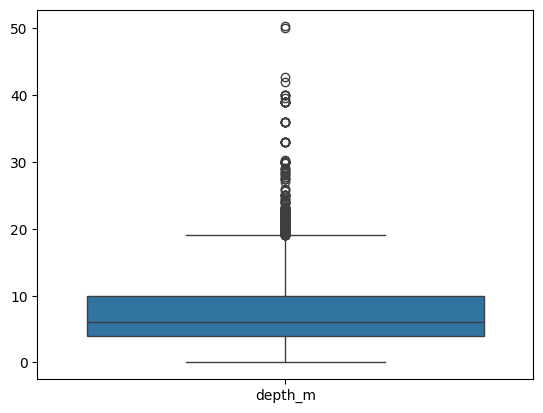

In [25]:
## DEPTH M

sns.boxplot(data=coral[['depth_m']])

<Axes: xlabel='depth_m', ylabel='Count'>

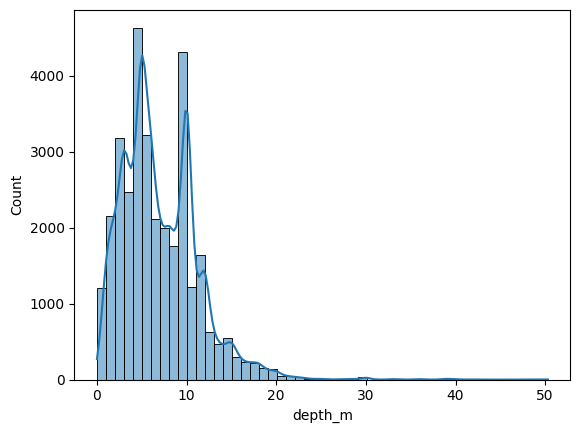

In [26]:
sns.histplot(coral["depth_m"], bins=50, kde=True)

In [27]:
coral["depth_m"] = coral["depth_m"].fillna(coral["depth_m"].median())

In [28]:
## DISTANCE TO SHORE

coral["distance_to_shore"].describe()

count     34510.000000
mean       3672.325921
std       13385.037571
min           3.200000
25%         126.240000
50%         476.030000
75%        1837.212500
max      299218.500000
Name: distance_to_shore, dtype: float64

In [29]:
coral["distance_to_shore"] = coral["distance_to_shore"].fillna(coral["distance_to_shore"].mean())

In [30]:
# TURBIDITY

coral["turbidity"].describe()

count    34506.000000
mean         0.075545
std          0.061991
min          0.000000
25%          0.039600
50%          0.057000
75%          0.084200
max          1.284500
Name: turbidity, dtype: float64

In [31]:
coral['turbidity'] = coral['turbidity'].fillna(coral["turbidity"].mean())

In [32]:
## REST OF NUMERICAL COLUMNS

# Running an Iterative Imputer to help fillin the null values of the rest of the dataframe

numerical_columns = coral.select_dtypes(include=['float64', 'int64']).columns
coral_numerical = coral[numerical_columns]

imputer = IterativeImputer(max_iter=10, random_state=42)

coral.loc[:, numerical_columns] = imputer.fit_transform(coral_numerical)

In [33]:
coral.isnull().sum()

latitude             0
longitude            0
ocean                0
realm                0
ecoregion            0
distance_to_shore    0
exposure             0
turbidity            0
cyclone_frequency    0
depth_m              0
bleaching_level      0
percent_bleaching    0
sst                  0
sst_maximum          0
windspeed            0
ssta                 0
ssta_maximum         0
ssta_frequency       0
ssta_dhw             0
tsa                  0
tsa_maximum          0
tsa_frequency        0
tsa_dhw              0
date                 0
dtype: int64

In [34]:
## CHECK FOR DUPLICATES

coral.duplicated().sum()

np.int64(11309)

In [35]:
coral = coral.drop_duplicates()

In [36]:
coral

,latitude,longitude,ocean,realm,ecoregion,distance_to_shore,exposure,turbidity,cyclone_frequency,depth_m,...,windspeed,ssta,ssta_maximum,ssta_frequency,ssta_dhw,tsa,tsa_maximum,tsa_frequency,tsa_dhw,date
0,23.1630,-82.5260,Atlantic,Tropical Atlantic,Cuba and Cayman Islands,8519.23,Exposed,0.0287,49.90,10.00,...,8.0,-0.46,2.24,0.0,0.00,-0.80,1.83,0.00,0.00,2005-09-15
1,-17.5750,-149.7833,Pacific,Eastern Indo-Pacific,Society Islands French Polynesia,1431.62,Exposed,0.0262,51.20,14.00,...,2.0,1.29,3.10,0.5,0.26,1.29,3.00,0.25,0.26,1991-03-15
2,18.3690,-64.5640,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,182.33,Exposed,0.0429,61.52,7.00,...,8.0,0.04,2.83,16.0,0.00,-2.64,2.31,7.00,0.00,2006-01-15
3,17.7600,-64.5680,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,313.13,Exposed,0.0424,65.39,9.02,...,3.0,-0.07,2.47,22.0,0.00,-2.27,2.19,3.00,0.00,2006-04-15
4,17.7690,-64.5830,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,792.00,Exposed,0.0424,65.39,12.50,...,3.0,0.00,2.30,16.0,0.00,-2.19,1.87,3.00,0.00,2006-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35038,10.1167,99.8444,Pacific,Central Indo-Pacific,Gulf of Thailand,73.88,Exposed,0.0565,50.27,5.00,...,2.0,1.40,3.74,2.0,1.37,1.26,3.35,1.00,1.33,2014-05-27
35040,18.3350,-64.8486,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,49.16,Sheltered,0.0586,85.57,3.00,...,8.0,0.32,2.34,12.0,10.14,0.21,1.76,5.00,6.22,2005-10-23
35042,-13.5002,47.8825,Indian,Western Indo-Pacific,North Madagascar,8768.03,Sometimes,0.0628,35.71,14.00,...,5.0,0.63,2.50,9.0,5.81,0.59,2.46,4.00,4.44,2016-04-18
35043,24.5019,-81.6328,Atlantic,Tropical Atlantic,Bahamas and Florida Keys,8170.00,Exposed,0.1203,58.42,4.00,...,5.0,3.91,6.20,25.0,51.11,3.91,6.19,25.00,50.63,2015-09-10


In [37]:
coral.columns

Index(['latitude', 'longitude', 'ocean', 'realm', 'ecoregion',
       'distance_to_shore', 'exposure', 'turbidity', 'cyclone_frequency',
       'depth_m', 'bleaching_level', 'percent_bleaching', 'sst', 'sst_maximum',
       'windspeed', 'ssta', 'ssta_maximum', 'ssta_frequency', 'ssta_dhw',
       'tsa', 'tsa_maximum', 'tsa_frequency', 'tsa_dhw', 'date'],
      dtype='object')

In [38]:
coral = coral[['date', 'latitude', 'longitude', 'ocean', 'realm', 'ecoregion', 'distance_to_shore', 'exposure', 'depth_m', 'turbidity', 'bleaching_level', 'percent_bleaching', 'cyclone_frequency', 'windspeed', 'sst', 'sst_maximum', 'ssta', 'ssta_maximum', 'ssta_frequency', 'tsa', 'ssta_dhw', 'tsa_maximum', 'tsa_frequency', 'tsa_dhw']]


In [39]:
coral = coral.reset_index().drop('index', axis=1)

In [40]:
coral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23203 entries, 0 to 23202
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               23203 non-null  datetime64[ns]
 1   latitude           23203 non-null  float64       
 2   longitude          23203 non-null  float64       
 3   ocean              23203 non-null  object        
 4   realm              23203 non-null  object        
 5   ecoregion          23203 non-null  object        
 6   distance_to_shore  23203 non-null  float64       
 7   exposure           23203 non-null  object        
 8   depth_m            23203 non-null  float64       
 9   turbidity          23203 non-null  float64       
 10  bleaching_level    23203 non-null  object        
 11  percent_bleaching  23203 non-null  float64       
 12  cyclone_frequency  23203 non-null  float64       
 13  windspeed          23203 non-null  float64       
 14  sst   

In [41]:
coral.to_csv("data/coral_clean.csv", index=False)